In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving 01_amazon_bestsellers with categories.csv to 01_amazon_bestsellers with categories (1).csv


**Dataset1 : Amazon Top 50 Bestselling Books 2009 - 2019**

In [ ]:
# Importing Dataset from Desktop

import io
df1 = pd.read_csv(io.BytesIO(uploaded1['01_amazon_bestsellers with categories.csv']),encoding='cp1252')
df1

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,12.0,2019.0,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413.0,8.0,2019.0,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331.0,8.0,NaN,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,NaN,4.7,14331.0,8.0,2017.0,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331.0,8.0,2018.0,Non Fiction


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         542 non-null    object 
 1   Author       538 non-null    object 
 2   User Rating  549 non-null    float64
 3   Reviews      545 non-null    float64
 4   Price        547 non-null    float64
 5   Year         549 non-null    float64
 6   Genre        549 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.2+ KB


**a).Line Chart**

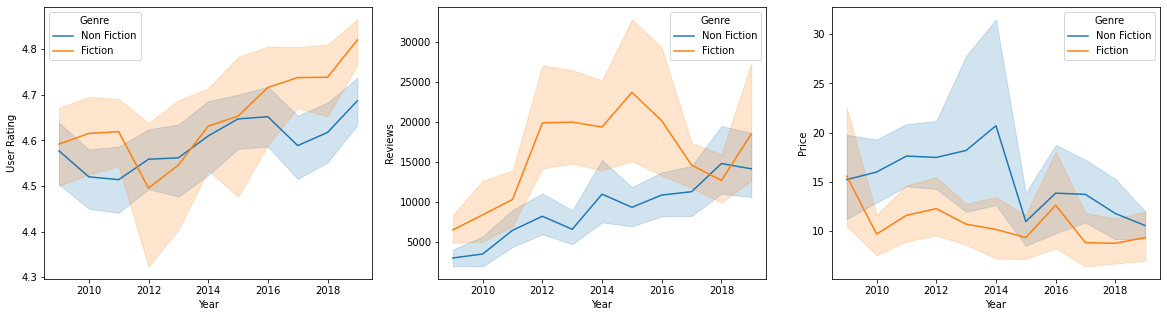

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
sns.lineplot(x='Year',y='User Rating',data=df1,hue='Genre',ax=axes[0])
sns.lineplot(x='Year',y='Reviews'    ,data=df1,hue='Genre',ax=axes[1])
sns.lineplot(x='Year',y='Price'      ,data=df1,hue='Genre',ax=axes[2])

**b). Bar Chart**

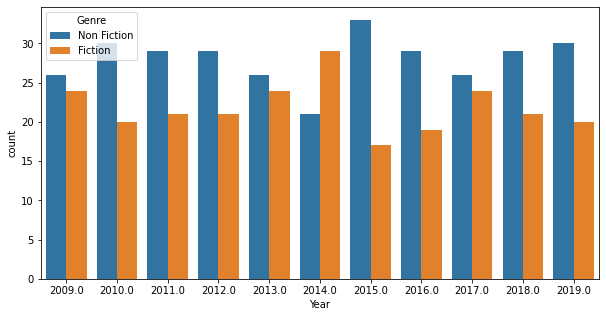

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax = sns.countplot(x=df1['Year'],hue=df1['Genre'])
plt.show()

**Heat Map**

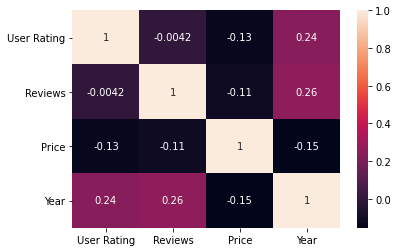

In [ ]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

**c). Scatter Plot**

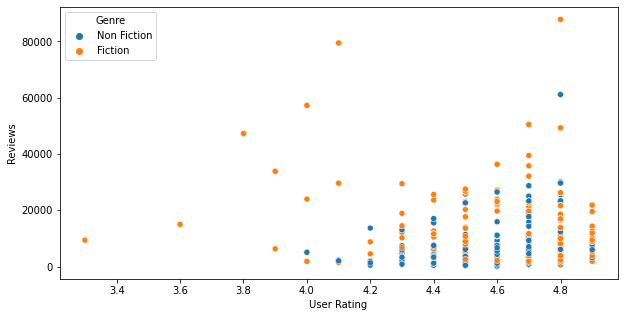

In [ ]:
fig,scat = plt.subplots(figsize=(10,5))
scat = sns.scatterplot(data=df1,x='User Rating',y='Reviews',hue='Genre')

**d). Pie Chart**

         Genre  Name  Author  User Rating  Reviews  Price  Year
0      Fiction   160      91           14      156     28    11
1  Non Fiction   189     155           10      190     35    11


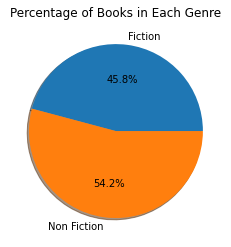

In [ ]:
f = df1.groupby(['Genre']).nunique(['Name']).reset_index()
print(f)
plt.title('Percentage of Books in Each Genre')
plt.pie(f['Name'],labels=f['Genre'],shadow=True,autopct='%1.1f%%')
plt.show()

**f). Histogram**

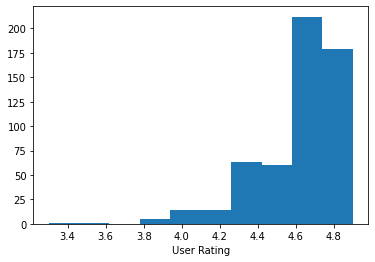

In [ ]:
plt.hist(df1['User Rating'],alpha=1, bins=10)
plt.xlabel('User Rating')
plt.show()

**g). Correlation Matrix**

In [ ]:
df1.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.004199,-0.133353,0.242155
Reviews,-0.004199,1.000000,-0.109379,0.263063
Price,-0.133353,-0.109379,1.000000,-0.154097
Year,0.242155,0.263063,-0.154097,1.000000


**2. Applying appropriate data pre-processing techniques on above datasets**

**a). Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ss=df1.drop(['Name','Author','Genre'],1)
print(scaler.fit(ss))
print("Scaler Mean: \n",scaler.mean_)
print("\nScaler transform:\n",scaler.transform(ss))

StandardScaler(copy=True, with_mean=True, with_std=True)
Scaler Mean: 
 [4.61839709e+00 1.19766312e+04 1.30822669e+01 2.01399636e+03]

Scaler transform:
 [[ 0.35951745  0.45658731 -0.46825505  0.63326202]
 [-0.08105192 -0.84331837  0.82163602 -0.94701456]
 [ 0.35951745  0.59500712  0.17669049  1.26537265]
 ...
 [ 0.35951745  0.20005605 -0.46825505  0.94931733]
 [ 0.35951745  0.20005605 -0.46825505  1.26537265]
 [ 0.35951745  0.20005605 -0.46825505  1.58142796]]


**a). Min-Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mms=df1.drop(['Name','Author','Genre'],1)
print(mmscaler.fit(mms))
print("MinMazScaler Mean: \n",mmscaler.data_max_)
print("\nMinMaxScaler transform:\n",mmscaler.transform(mms))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMazScaler Mean: 
 [4.9000e+00 8.7841e+04 1.0500e+02 2.0190e+03]

MinMaxScaler transform:
 [[0.875      0.19717781 0.07619048 0.7       ]
 [0.8125     0.02294884 0.20952381 0.2       ]
 [0.875      0.21573049 0.14285714 0.9       ]
 ...
 [0.875      0.16279441 0.07619048 0.8       ]
 [0.875      0.16279441 0.07619048 0.9       ]
 [0.875      0.16279441 0.07619048 1.        ]]


**a).Robust Scaling**

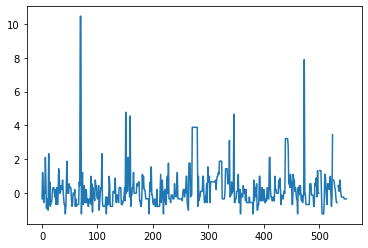

In [ ]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
df_1 = rscaler.fit_transform(df1[['Price','Reviews']])
df_1 = pd.DataFrame(df_1, columns=['Price','Reviews'])
df_1['Price'].plot()

**b). Label Encoding**

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1_0 = df1.dropna()
df1_0['Year']= label_encoder.fit_transform(df1_0['Year']) 
  
print(df1_0['Year'].unique()) 

[ 7  2  9  8 10  5  1  0  6  4  3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**c). One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
enc = OneHotEncoder(handle_unknown='ignore')
df_0 = df1.dropna()

enc_df = pd.DataFrame(enc.fit_transform(df_0[['Genre']]).toarray())
df_0 = df_0.join(enc_df)
df_0

,Name,Author,User Rating,Reviews,Price,Year,Genre,0,1
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction,0.0,1.0
1,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction,1.0,0.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction,0.0,1.0
3,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction,1.0,0.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,12.0,2019.0,Non Fiction,0.0,1.0
...,...,...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625.0,9.0,2016.0,Fiction,NaN,NaN
544,Wonder,R. J. Palacio,4.8,21625.0,9.0,2017.0,Fiction,NaN,NaN
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413.0,8.0,2019.0,Fiction,NaN,NaN
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331.0,8.0,2018.0,Non Fiction,NaN,NaN


**e). Handling Outliers**

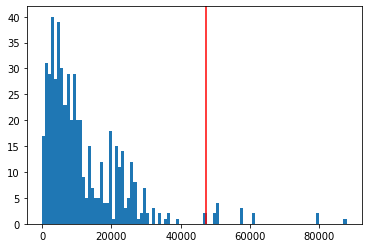

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         542 non-null    object 
 1   Author       538 non-null    object 
 2   User Rating  549 non-null    float64
 3   Reviews      545 non-null    float64
 4   Price        547 non-null    float64
 5   Year         549 non-null    float64
 6   Genre        549 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         524 non-null    object 
 1   Author       520 non-null    object 
 2   User Rating  530 non-null    float64
 3   Reviews      531 non-null    float64
 4   Price        529 non-null    float64
 5   Year         530 non-null    float64
 6   Genre        530 non

In [ ]:
plt.hist(df1['Reviews'], bins=100)
outlier_limit = (df1['Reviews'].mean() + 3*df1['Reviews'].std())
plt.axvline(x=outlier_limit, color='r')
plt.show()
df1.info()
df1 = df1[df1['Reviews'] <= outlier_limit]
df1.info()

**Dataset2 : Iris Flower Dataset**

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving 02_Iris.csv to 02_Iris.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded2['02_Iris.csv']))
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,NaN
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica


**a). Line Chart**

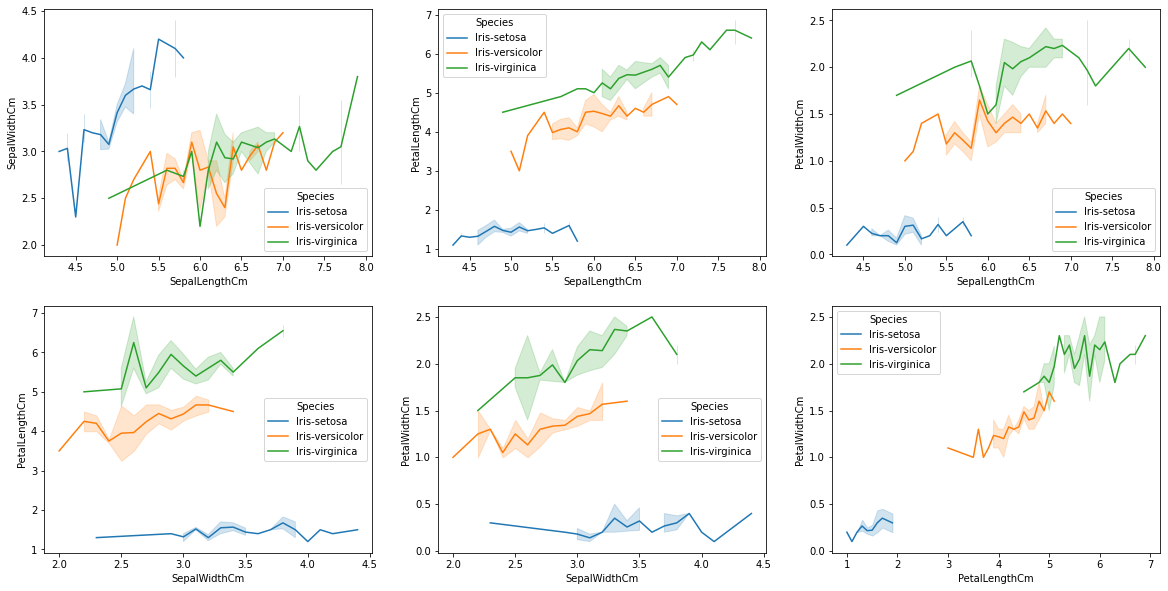

In [ ]:
fig,axes = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(data=df2, x='SepalLengthCm', y='SepalWidthCm' ,hue='Species',ax=axes[0,0])
sns.lineplot(data=df2, x='SepalLengthCm', y='PetalLengthCm',hue='Species',ax=axes[0,1])
sns.lineplot(data=df2, x='SepalLengthCm', y='PetalWidthCm' ,hue='Species',ax=axes[0,2])
sns.lineplot(data=df2, x='SepalWidthCm',  y='PetalLengthCm',hue='Species',ax=axes[1,0])
sns.lineplot(data=df2, x='SepalWidthCm',  y='PetalWidthCm' ,hue='Species',ax=axes[1,1])
sns.lineplot(data=df2, x='PetalLengthCm', y='PetalWidthCm' ,hue='Species',ax=axes[1,2])

**b). Histogram**

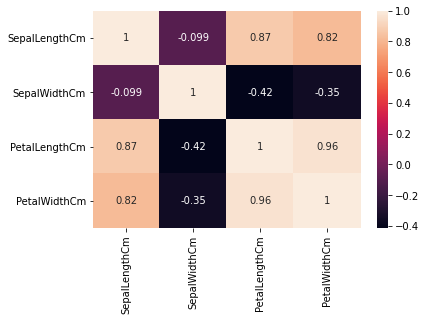

In [ ]:
df22 = df2.drop('Id',1)
sns.heatmap(df22.corr(),annot=True)
plt.show()

**c). Scatter Plot**

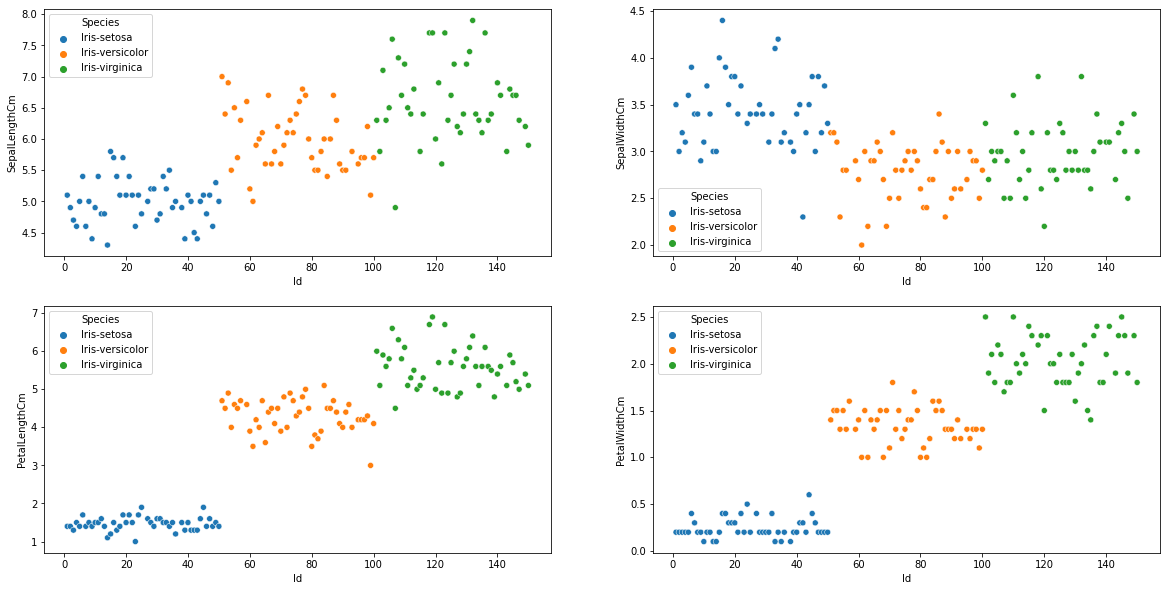

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(20,10))
sns.scatterplot(data=df2,x='Id', y='SepalLengthCm',hue='Species',ax=axes[0,0])
sns.scatterplot(data=df2,x='Id', y='SepalWidthCm',hue='Species' ,ax=axes[0,1])
sns.scatterplot(data=df2,x='Id', y='PetalLengthCm',hue='Species',ax=axes[1,0])
sns.scatterplot(data=df2,x='Id', y='PetalWidthCm',hue='Species' ,ax=axes[1,1])

**d). Pie Chart**

           Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      Iris-setosa             48            46             48            48
1  Iris-versicolor             47            47             48            48
2   Iris-virginica             46            47             48            48


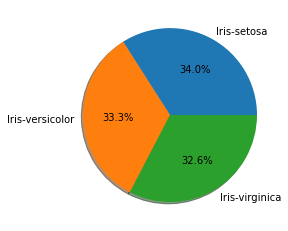

In [ ]:
f1 = df22.groupby(['Species']).count().reset_index()
print(f1)
plt.pie(f1['SepalLengthCm'],labels=f1['Species'],shadow=True,autopct='%1.1f%%')
plt.show()

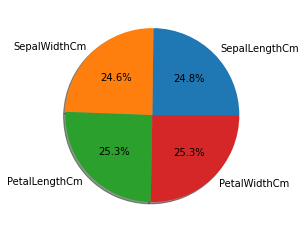

In [ ]:
w = df2.drop(['Id','Species'],1)
plt.pie(w.count(),labels=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],shadow=True,autopct='%1.1f%%')
plt.show()

**e). Area Chart**

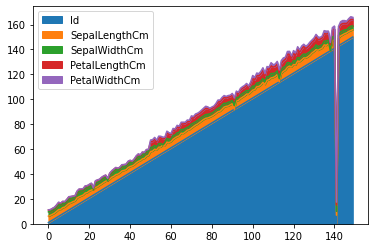

In [ ]:
df2.plot.area()

**f).Histogram**

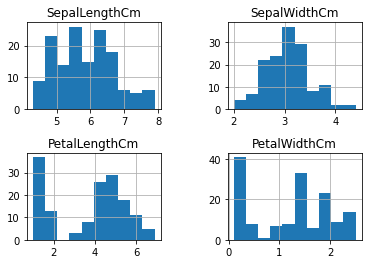

In [ ]:
q = df2.drop('Id',1).hist()
plt.subplots_adjust(wspace=1/2, hspace=1/2)

**g). Correlation Matrix**

In [ ]:
df2.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.719416,-0.395838,0.883620,0.898264
SepalLengthCm,0.719416,1.000000,-0.099452,0.874489,0.823090
SepalWidthCm,-0.395838,-0.099452,1.000000,-0.415212,-0.351303
PetalLengthCm,0.883620,0.874489,-0.415212,1.000000,0.962757
PetalWidthCm,0.898264,0.823090,-0.351303,0.962757,1.000000


**2. Applying appropriate data pre-processing techniques on above datasets.**

**a). Min Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mms1=df2.drop(['Id','Species'],1)
print(mmscaler.fit(mms1))
print("MinMazScaler Mean: \n",mmscaler.data_max_)
print("\nMinMaxScaler transform:\n",mmscaler.transform(mms1))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMazScaler Mean: 
 [7.9 4.4 6.9 2.5]

MinMaxScaler transform:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.083333

**b). Label Encoding**

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df2_0 = df2.dropna()
df2_0['Species']= label_encoder.fit_transform(df2_0['Species'])  
df2_0['Species'].unique() 
df2_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,0
1,2.0,4.9,3.0,1.4,0.2,0
2,3.0,4.7,3.2,1.3,0.2,0
3,4.0,4.6,3.1,1.5,0.2,0
4,5.0,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
144,145.0,6.7,3.3,5.7,2.5,2
145,146.0,6.7,3.0,5.2,2.3,2
146,147.0,6.3,2.5,5.0,1.9,2
148,149.0,6.2,3.4,5.4,2.3,2


**c) One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
enc = OneHotEncoder(handle_unknown='ignore')
df2_1 = df2.dropna()

enc_df = pd.DataFrame(enc.fit_transform(df2_1[['Species']]).toarray())
df2_1 = df2_1.join(enc_df)
df2_1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0,1,2
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
144,145.0,6.7,3.3,5.7,2.5,Iris-virginica,NaN,NaN,NaN
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica,NaN,NaN,NaN
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica,NaN,NaN,NaN
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica,NaN,NaN,NaN


**f). Handling Missing Values**

In [ ]:
df_3 = df2.fillna(df2.mean)
df_3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3,5.2,2.0,<bound method DataFrame.mean of Id Se...
148,149,6.2,3.4,5.4,2.3,Iris-virginica
